In [16]:
# Imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.formula.api as smf

import sklearn.linear_model
from sklearn import feature_selection, linear_model

# MAGIC!
%matplotlib inline

In [14]:
def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals)
    # keep the model
    return algo

In [3]:
bike_data = pd.read_csv('../../assets/dataset/bikeshare/bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


                temp     atemp  windspeed       hum  registered
temp        1.000000  0.987672  -0.023125 -0.069881    0.335361
atemp       0.987672  1.000000  -0.062336 -0.051918    0.332559
windspeed  -0.023125 -0.062336   1.000000 -0.290105    0.082321
hum        -0.069881 -0.051918  -0.290105  1.000000   -0.273933
registered  0.335361  0.332559   0.082321 -0.273933    1.000000
Axes(0.125,0.125;0.62x0.755)


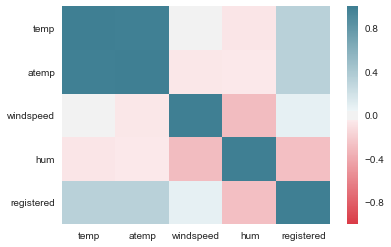

In [7]:
#Multicolinearity
cmap = sns.diverging_palette(10, 220, as_cmap=True) #creates colors below

correlations = bike_data[['temp', 'atemp', 'windspeed', 'hum', 'registered']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(3):
    print bike_data[['temp', 'atemp', 'registered']].columns[i]
    print vif(bike_data[['temp', 'atemp', 'registered']].as_matrix(), i) 
    #If > 5, starting to be highly collinear with other explanatory variables, large standard errors
    #temp appears to be the greatest

temp
281.797179796
atemp
281.808238098
registered
2.28501751275


temp
P Values: [ 0.]
Coefficients: [ 263.60786447]
y-intercept: 22.7771430753
R-Squared: 0.112466899071

atemp
P Values: [ 0.]
Coefficients: [ 292.9014216]
y-intercept: 14.4316654332
R-Squared: 0.110595245982

temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 221.4039422    47.87924122]
y-intercept: 20.9722000195
R-Squared: 0.11253931273



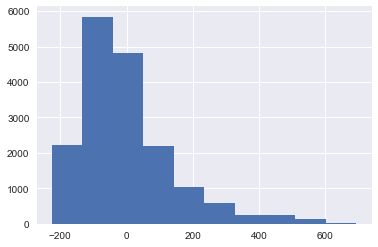

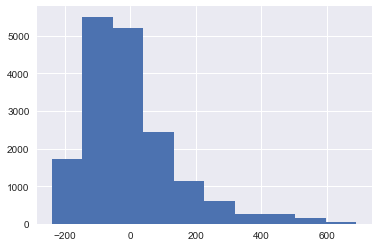

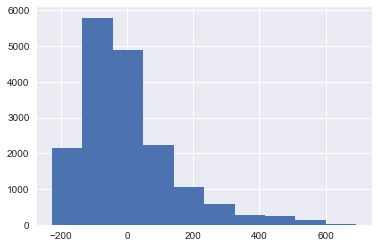

In [17]:
y = bike_data['registered']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
) 
#the third is both togethor (see third section). if two are highly coorelated, pick the one with the higher R^2

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

#The highest R^2 looks like its temp

P Values: [  0.00000000e+000   1.01368000e-296]
Coefficients: [ 249.78057011 -197.48476843]
y-intercept: 153.517273043
R-Squared: 0.175523897744
4.63852899915


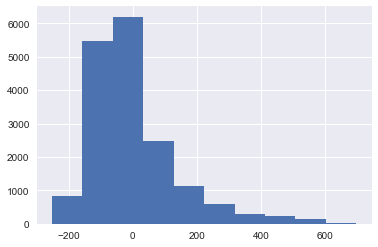

In [21]:
y = bike_data['registered']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())
print vif(bike_data[['temp', 'hum', 'registered']].as_matrix(), 1)
#humidity is not highly correlated

P Values: [  4.43016006e-37   2.05227213e-05   4.73056490e-52]
Coefficients: [ 92.65717457  73.9035358   23.85694151]
y-intercept: 71.6666666667
R-Squared: 0.016103769089



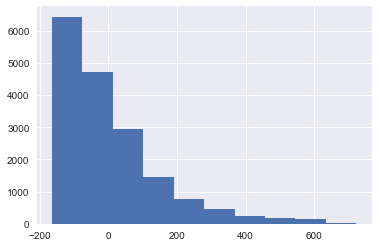

In [23]:
#here is the look at all weather situations
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)
print

In [24]:
#droping one of the dummies: includes 1,2,3 instead of 1,2,3,4
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     94.79
Date:                Thu, 23 Mar 2017   Prob (F-statistic):           7.48e-61
Time:                        16:10:12   Log-Likelihood:            -1.1175e+05
No. Observations:               17379   AIC:                         2.235e+05
Df Residuals:                   17375   BIC:                         2.235e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                71.6667     86.687      0.827      0.408       -98.249   241.582
weather[[1, 2, 3]][0]    92.6572     86.699      1.069      0.285       -77.281   262.595
weather[[1, 2, 3]][1]    73.9035     86.716      0.852      0.394       -96.068   243.875
weather[[1, 2, 3]][2]    23.8569     86.779      0.275      0.783      -146.238   193.952
==============================================================================
Omnibus:                     4894.003   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12474.551
Skew:                           1.544   Prob(JB):                         0.00
Kurtosis:                       5.773   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

           windspeed      temp       hum
windspeed   1.000000 -0.023125 -0.290105
temp       -0.023125  1.000000 -0.069881
hum        -0.290105 -0.069881  1.000000
Axes(0.125,0.125;0.62x0.755)


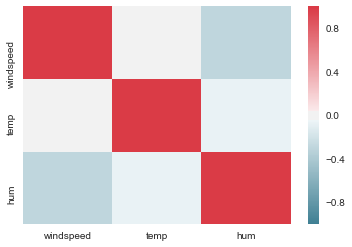

In [25]:
#command backslash comments everything (#/)
#starter 
lm = linear_model.LinearRegression()
bikemodel_data = bike_data.join(bike_data[['windspeed', 'temp', 'hum']], lsuffix='x') # add in the three weather situations

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bike_data[['windspeed', 'temp', 'hum']].corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)

columns_to_keep = ['windspeedx', 'tempx'] #[which_variables?]
final_feature_set = bikemodel_data[columns_to_keep]

P Values: [  4.03672389e-52   0.00000000e+00]
Coefficients: [ 0.61018738  1.10076298]
y-intercept: 1.23828881013
R-Squared: 0.134964179435


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

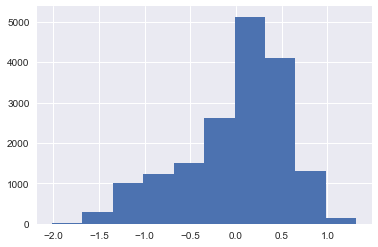

In [26]:
#sklearn
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)